**Réalisé avec l'aide du tutoriel "SCIPY PYTHON Tutoriel - Optimize, Fourier, NdImage (16/30)" sur Youtube, par Machine Learnia.**

Lien de la vidéo: https://www.youtube.com/watch?v=P0Xr5TIML8U

## 4) Image processing.

In [1]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

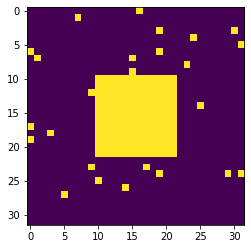

In [2]:
# Création d'une image avec quelques artefacts.
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10, 10:-10] = 1
# Ajouts artefacts:
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)
plt.show()


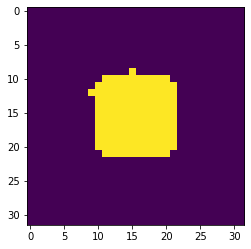

In [3]:
# Nettoyage des artefacts.
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)
plt.show()

---

## Application : Image processing (étude de bacteries).

In [4]:
# On importe l'image de bactéries.
image = plt.imread('Bacteria.jpg')

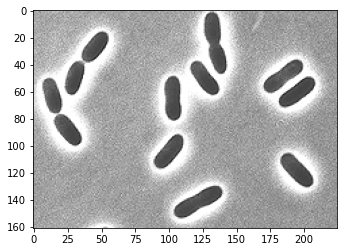

In [5]:
# si l'image est en 3d, on la redimensionne : image = image[:, :, 0]
image.shape
plt.imshow(image, cmap='gray')
plt.show()

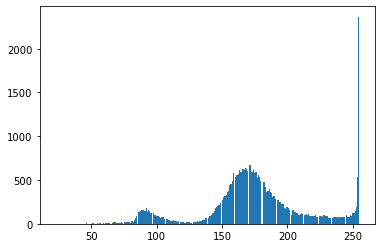

In [6]:
# Copie de l'image puis transformation en histogramme, pour la nettoyer ensuite.
image_copy = np.copy(image)
plt.hist(image_copy.ravel(), bins=255)
plt.show()

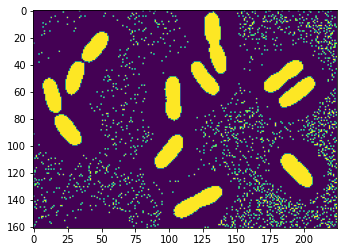

In [7]:
# Boolean indexing : création d'une image binaire.
bin_image = image < 150
plt.imshow(bin_image)
plt.show()

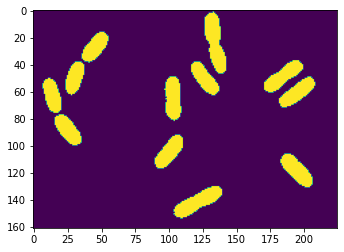

In [8]:
# Utilisation de morphologie pour nettoyer les artefacts.
open_im = ndimage.binary_opening(bin_image)
plt.imshow(open_im)
plt.show()

In [9]:
# Segmentation de l'image: 
# label_image contient les différents labels et n_labels est le nombre de labels.
label_image, n_labels = ndimage.label(open_im)
print(f'Il y a {n_labels} groupes reconnus.')

Il y a 12 groupes reconnus.


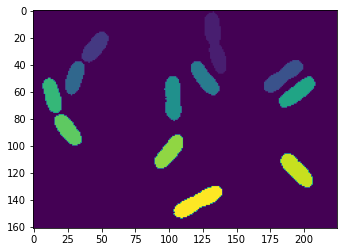

In [10]:
# Affichage des groupes étiquetés.
plt.imshow(label_image)
plt.show()

In [11]:
# Mesure de la taille des groupes.
sizes = ndimage.sum(open_im, label_image, range(n_labels))
sizes

array([  0., 450., 266., 328., 245., 279., 327., 307., 253., 275., 297.,
       322.])

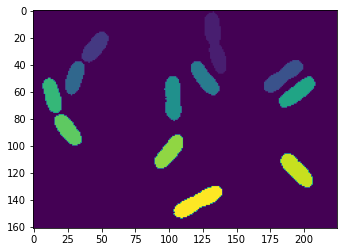

In [12]:
plt.imshow(label_image)
plt.show()

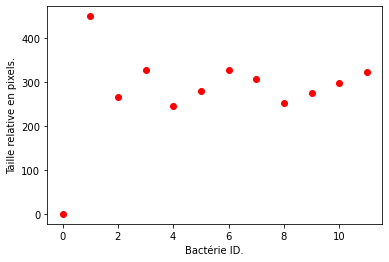

In [13]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes, c='r')
plt.xlabel('Bactérie ID.')
plt.ylabel('Taille relative en pixels.')
plt.show()

---